<a href="https://colab.research.google.com/github/arnav03mehta/schoolPhysics/blob/master/notebooks/throwSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1> Physics art-integration project </h1>
<h4>for the month of august 2020</h4>
by Arnav Mehta


In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np

class thing :
    
    '''
      Created a class called thing, which will be the object you throw.
      To use this, you first have to create an object, which you do as follows :

          thingName = thing()

      after you create the object to be thrown, you have two methods with 
      which you throw, throw_from_ground and throw_horizontally, both of which
      are explained below. To finally throw the thing, just do :

          thingName.throw_horizontally(velocity,height)
      or
          thingName.throw_from_ground(velocity,angle)
    '''

    g = 9.8
    def __init__(self,mass=0.001) :
        self.mass = mass 
        self.weight = mass*self.g

    def throw_from_ground(self,velocity,angle_in_deg=0,angle_in_rad=0) :
        g = self.g

        if angle_in_deg :
            legend_ =  f'{velocity}m/s, {angle_in_deg} deg'
        else :
            legend_ =  f'{velocity}m/s, {angle_in_rad} rad'

        '''
          This method will simulate throwing the initialised thing from groung up.
          which takes in 3 arguments, i.e. initial velocity of the thing and two
          optional arguments between which determine the angle to throw you can
          either give the angle in degree or radian.
        '''

        if angle_in_rad == 0 and angle_in_deg != 0 :
            angle = math.radians(angle_in_deg)
        else :
            angle = angle_in_rad
        x_pos = lambda t : velocity*math.cos(angle) * t
        y_pos = lambda t : (velocity*math.sin(angle)*t)-((g*(t**2))/2)
        T = 2*velocity*math.sin(angle) / g

        xList = [ x_pos(i) for i in np.arange(0,T,0.01) ]
        yList = [ y_pos(i) for i in np.arange(0,T,0.01) ]

        max_height = (velocity**2)*math.sin(2*angle)/g
        max_dist = (velocity**2)*(math.sin(angle)**2)/(2*g)
        
        print()
        print(f"Total time in air(in seconds) : {T}")
        print(f"Max horizontal distance(in meters) : { max_height }")
        print(f"Max height reached(in meters) : { max_dist }")
        
        plt.plot(xList,yList,label=legend_)
        plt.xlabel('---------- x -------->')
        plt.ylabel('---------- y -------->')
        plt.grid(True)

        if max_height > max_dist :
            plt.ylim([0,max_height])
        else :
            plt.xlim([0,max_dist])
        plt.legend()
        plt.show()

    def throw_horizontally(self,velocity,height) :
        g = self.g

        '''
          This method is similar in functionality to the above one,
          the main difference being that this method throws the thing 
          horizontally in front of you, because of which it only takes two 
          arguments, i.e. initial velocity and height from which to throw.
        '''

        x_pos = lambda t : velocity * t
        y_pos = lambda t : height- 0.5*g*(t**2)
        T = (2*height/g)**(1/2)

        xList = [ x_pos(i) for i in np.arange(0,T,0.0001) ]
        yList = [ y_pos(i) for i in np.arange(0,T,0.0001) ]
        max_dist = velocity*T
        
        print()
        print(f"Total time in air : {T}")
        print(f"Max horizontal distance : { max_dist }")
        
        plt.plot(xList,yList,label=f'{velocity}m/s, {height}m')

        plt.xlabel('---------- x -------->')
        plt.ylabel('---------- y -------->')
        plt.grid(True)
        
        plt.xlim([0,height])
        plt.legend()
        plt.show()




Total time in air(in seconds) : 1.5633560063652612
Max horizontal distance(in meters) : 10.049058704206203
Max height reached(in meters) : 2.994000453231965


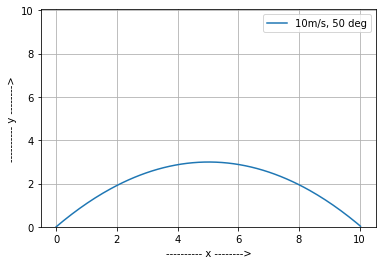


Total time in air : 1.4285714285714286
Max horizontal distance : 7.142857142857143


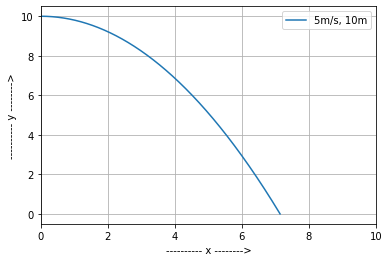

In [6]:
theObject = thing()
v = 10 # int(input("how much initial velocity(in m/s) do you want? : "))
d = 50 # int(input("at what angle(in degree) you want to throw at? : "))
theObject.throw_from_ground(v,angle_in_deg=d)

v = 5 # int(input("how much initial velocity(in m/s) do you want? : "))
h = 10 # int(input("from what height(in meters) you want to throw at? : "))
theObject.throw_horizontally(v,h)